In [47]:
import pandas as pd
import numpy as np

In [90]:
data_4 = pd.read_excel("Data Sets/Data Set 4.xlsx")
data_4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY


In [91]:
X_variables = data_4.drop('median_house_value',axis = 1)
X_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.3+ MB


In [92]:
mean_households = X_variables.loc[X_variables.total_bedrooms.isnull()==False,'households'].mean()
mean_bedrooms = X_variables.loc[X_variables.total_bedrooms.isnull()==False,'total_bedrooms'].mean()
print(f"Mean Households = {mean_households} and Mean total_bedrooms = {mean_bedrooms}")
print(f"Ratio of Bedrooms to Households = {mean_bedrooms/mean_households}")

Mean Households = 499.3758707009142 and Mean total_bedrooms = 537.7111993905094
Ratio of Bedrooms to Households = 1.0767664818001488


In [93]:
X_variables.loc[X_variables.total_bedrooms.isnull()==True,'total_bedrooms'] = round(data_4.
                                                                          loc[X_variables.total_bedrooms.isnull()==True,
                                                                              'households']*mean_bedrooms/mean_households,0)

In [94]:
X_variables.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY


In [95]:
X_variables = pd.get_dummies(X_variables,
                                columns= data_4.select_dtypes('object').columns,
                               drop_first = True)

In [96]:
Y_variables = data_4.median_house_value

In [97]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_variables,Y_variables, test_size = .20, random_state = 1)
x_scale  = preprocessing.StandardScaler()

In [98]:
X_train.loc[:,
            X_train.columns.str.contains('ocean_proximity')==False] = x_scale.fit_transform(X_train.loc[:,
                                                                                                       X_train.columns.str.contains('ocean_proximity')==False])



In [118]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,14852.0,1.808171e-15,1.000034,-2.351954,-1.112283,0.533144,0.784564,2.621667
latitude,14852.0,-1.309423e-15,1.000034,-1.441975,-0.797681,-0.643611,0.971793,2.946693
housing_median_age,14852.0,-2.822652e-17,1.000034,-2.195862,-0.843743,0.031157,0.667448,1.860494
total_rooms,14852.0,-2.822652e-17,1.000034,-1.180703,-0.534386,-0.231341,0.222445,16.393226
total_bedrooms,14852.0,2.726968e-17,1.000034,-1.253959,-0.567628,-0.245473,0.251767,13.786966
population,14852.0,-5.525699e-17,1.000034,-1.224101,-0.552366,-0.228525,0.253372,29.421441
households,14852.0,-3.277146e-17,1.000034,-1.283105,-0.565546,-0.236343,0.270321,14.354026
median_income,14852.0,-2.631285e-16,1.000034,-1.786924,-0.693216,-0.169493,0.468553,5.908157
ocean_proximity_INLAND,14852.0,3.173983e-01,0.465480,0.000000,0.000000,0.000000,1.000000,1.000000
ocean_proximity_ISLAND,14852.0,2.019930e-04,0.014211,0.000000,0.000000,0.000000,0.000000,1.000000


In [100]:
X_test.loc[:,X_test.columns.str.contains('ocean_proximity')==False] = x_scale.fit_transform(X_test.loc[:,
                                                                                                       X_test.columns.str.contains('ocean_proximity')==False])

In [119]:
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,3713.0,-7.109255e-16,1.000135,-2.426175,-1.087535,0.539040,0.776459,2.488908
latitude,3713.0,9.290829e-16,1.000135,-1.452635,-0.791336,-0.644906,0.984724,2.949727
housing_median_age,3713.0,8.180905e-17,1.000135,-2.126967,-0.769993,0.028227,0.666803,1.864133
total_rooms,3713.0,6.315085e-17,1.000135,-1.278386,-0.582262,-0.241868,0.267732,8.804281
total_bedrooms,3713.0,-2.105028e-17,1.000135,-1.302839,-0.586633,-0.242066,0.264939,9.974331
population,3713.0,-2.105028e-17,1.000135,-1.335269,-0.596289,-0.227275,0.299616,10.480795
households,3713.0,-4.975521e-17,1.000135,-1.337406,-0.590582,-0.241701,0.284347,10.036668
median_income,3713.0,-4.401423e-17,1.000135,-1.734041,-0.671724,-0.186198,0.430921,5.734113
ocean_proximity_INLAND,3713.0,3.250741e-01,0.468466,0.000000,0.000000,0.000000,1.000000,1.000000
ocean_proximity_ISLAND,3713.0,5.386480e-04,0.023206,0.000000,0.000000,0.000000,0.000000,1.000000


In [120]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,14852.0,1.808171e-15,1.000034,-2.351954,-1.112283,0.533144,0.784564,2.621667
latitude,14852.0,-1.309423e-15,1.000034,-1.441975,-0.797681,-0.643611,0.971793,2.946693
housing_median_age,14852.0,-2.822652e-17,1.000034,-2.195862,-0.843743,0.031157,0.667448,1.860494
total_rooms,14852.0,-2.822652e-17,1.000034,-1.180703,-0.534386,-0.231341,0.222445,16.393226
total_bedrooms,14852.0,2.726968e-17,1.000034,-1.253959,-0.567628,-0.245473,0.251767,13.786966
population,14852.0,-5.525699e-17,1.000034,-1.224101,-0.552366,-0.228525,0.253372,29.421441
households,14852.0,-3.277146e-17,1.000034,-1.283105,-0.565546,-0.236343,0.270321,14.354026
median_income,14852.0,-2.631285e-16,1.000034,-1.786924,-0.693216,-0.169493,0.468553,5.908157
ocean_proximity_INLAND,14852.0,3.173983e-01,0.465480,0.000000,0.000000,0.000000,1.000000,1.000000
ocean_proximity_ISLAND,14852.0,2.019930e-04,0.014211,0.000000,0.000000,0.000000,0.000000,1.000000


In [129]:
#Import some crucial tools from tensorflow library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score
from tensorflow.keras.losses import MeanSquaredError

In [122]:
#A custom metric r_square is defined
def r_square(y_test, y_predtest):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_test - y_predtest)) 
    SS_tot = K.sum(K.square(y_test - K.mean(y_test))) 
    return (1 - (SS_res)/(SS_tot))

In [138]:
#r2 = r2_score()
from math import sqrt
#Architcture of NN with dropout layer
def create_model():
    model = Sequential()
    model.add(Dense(400, input_dim=12, activation='tanh'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    #model.add(Dropout(0.20))
    model.add(Dense(300, activation='relu'))
    #model.add(Dropout(0.20))
    model.add(Dense(1))
    # Compile model
    sgd = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=sgd, metrics = [MeanSquaredError()])
    return model
#Model is called here
model=create_model()

In [139]:
model = model.fit(X_train.values, # Features
                      y_train.values, # Target vector
                      epochs = 100,
                      verbose = 1,
                      validation_data = (X_test.values,y_test.values)) # Data for evaluation

Epoch 1/100
  7/465 [..............................] - ETA: 3s - loss: 52549718016.0000 - mean_squared_error: 52549718016.0000  

2022-08-13 10:19:23.545932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


464/465 [============================>.] - ETA: 0s - loss: 6623114240.0000 - mean_squared_error: 6623114240.0000

2022-08-13 10:19:27.394404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


465/465 [==============================] - 4s 9ms/step - loss: 6623259648.0000 - mean_squared_error: 6624275456.0000 - val_loss: 4677061632.0000 - val_mean_squared_error: 4644853760.0000
Epoch 2/100
465/465 [==============================] - 4s 8ms/step - loss: 4119323392.0000 - mean_squared_error: 4126839552.0000 - val_loss: 3829944832.0000 - val_mean_squared_error: 3802800128.0000
Epoch 3/100
465/465 [==============================] - 4s 8ms/step - loss: 4060521472.0000 - mean_squared_error: 4062705152.0000 - val_loss: 3775257600.0000 - val_mean_squared_error: 3746879488.0000
Epoch 4/100
465/465 [==============================] - 4s 8ms/step - loss: 3788295680.0000 - mean_squared_error: 3784857856.0000 - val_loss: 3641737216.0000 - val_mean_squared_error: 3611651584.0000
Epoch 5/100
465/465 [==============================] - 4s 8ms/step - loss: 3577355008.0000 - mean_squared_error: 3574080768.0000 - val_loss: 3840031232.0000 - val_mean_squared_error: 3808332544.0000
Epoch 6/100
465/4

465/465 [==============================] - 4s 9ms/step - loss: 2541627648.0000 - mean_squared_error: 2538047488.0000 - val_loss: 3215664640.0000 - val_mean_squared_error: 3189046016.0000
Epoch 43/100
465/465 [==============================] - 4s 9ms/step - loss: 2532860928.0000 - mean_squared_error: 2535439872.0000 - val_loss: 3142793728.0000 - val_mean_squared_error: 3117037312.0000
Epoch 44/100
465/465 [==============================] - 4s 9ms/step - loss: 2532822272.0000 - mean_squared_error: 2529451520.0000 - val_loss: 3403505152.0000 - val_mean_squared_error: 3375324928.0000
Epoch 45/100
465/465 [==============================] - 4s 9ms/step - loss: 2478478848.0000 - mean_squared_error: 2474216192.0000 - val_loss: 3084036352.0000 - val_mean_squared_error: 3058540032.0000
Epoch 46/100
465/465 [==============================] - 4s 9ms/step - loss: 2529223168.0000 - mean_squared_error: 2527211776.0000 - val_loss: 2859496960.0000 - val_mean_squared_error: 2835824384.0000
Epoch 47/100


465/465 [==============================] - 4s 9ms/step - loss: 2111958016.0000 - mean_squared_error: 2108494848.0000 - val_loss: 3460241920.0000 - val_mean_squared_error: 3431641600.0000
Epoch 84/100
465/465 [==============================] - 4s 9ms/step - loss: 2117918592.0000 - mean_squared_error: 2119564032.0000 - val_loss: 2958207744.0000 - val_mean_squared_error: 2933738240.0000
Epoch 85/100
465/465 [==============================] - 4s 9ms/step - loss: 2136638080.0000 - mean_squared_error: 2140499712.0000 - val_loss: 2995317248.0000 - val_mean_squared_error: 2970516736.0000
Epoch 86/100
465/465 [==============================] - 4s 9ms/step - loss: 2093530624.0000 - mean_squared_error: 2098104704.0000 - val_loss: 3355736576.0000 - val_mean_squared_error: 3328024576.0000
Epoch 87/100
465/465 [==============================] - 4s 9ms/step - loss: 2088322432.0000 - mean_squared_error: 2087379712.0000 - val_loss: 3493239040.0000 - val_mean_squared_error: 3464483328.0000
Epoch 88/100


In [84]:
X_train_np

array([[1.8599409878059985, -1.0031079923069495, -0.6846706304989558,
        ..., -0.6452745042069042, -0.9724241725448142, 'INLAND'],
       [0.6103125319006563, -0.7323178391355273, 1.5423484521508195, ...,
        -0.6915686419743576, -0.13584775707346097, '<1H OCEAN'],
       [0.9339214945853036, -0.7416554306241985, -0.3665250472632737,
        ..., -0.07688536828428319, 0.46096386233727454, 'INLAND'],
       ...,
       [0.6600985261598306, -0.6949674731808491, -1.0823526095435585,
        ..., 1.0007392830803241, -0.09530320103310864, '<1H OCEAN'],
       [1.1231082727701815, -0.6902986774365151, -1.5595709843970817,
        ..., -0.8973203653852612, 0.07881550101976564, 'INLAND'],
       [-1.3064482470776686, 0.995136586268379, 0.8265208898705345, ...,
        0.09285980352971224, -0.8548768013021696, 'NEAR BAY']],
      dtype=object)

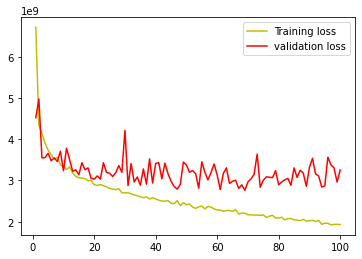

In [67]:
#Loss v/s epochs plot
import matplotlib.pyplot as plt
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend( loc ='best')
plt.show()